In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('returns.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   return_id          20500 non-null  object 
 1   user_id            20500 non-null  object 
 2   sku_id             20500 non-null  object 
 3   return_date        20500 non-null  object 
 4   return_reason      20310 non-null  object 
 5   product_condition  20309 non-null  object 
 6   refund_amount      20295 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.1+ MB


In [ ]:
df_return = dataset.copy()
df_return.head()

,return_id,user_id,sku_id,return_date,return_reason,product_condition,refund_amount
0,R00001,U2402,P0654,2024-07-16,Missing parts,Used,1925.59
1,R00002,U4300,P0268,2024-10-18,Wrong product,Used,2386.87
2,R00003,U3013,P0037,2025-03-03,Poor quality,Opened,1773.01
3,R00004,U2035,P0603,2025-06-23,NaN,Opened,1484.13
4,R00005,U4557,P0981,2024-08-27,Poor quality,New,159.07


In [ ]:
# df_return.describe().T
df_return.shape

(20500, 7)

In [ ]:
# handling missing value
df_return.isnull().sum()

,0
return_id,0
user_id,0
sku_id,0
return_date,0
return_reason,190
product_condition,191
refund_amount,205


In [ ]:
#duplicates rows ?
df_return.duplicated().sum()

np.int64(0)

# Missing values

In [ ]:
# Handling missing values
df_return['return_reason'] = df_return['return_reason'].fillna('Unknown')
df_return['product_condition'] = df_return['product_condition'].fillna('Unknown')
df_return['refund_amount'] = df_return['refund_amount'].fillna(0)

In [ ]:
# formatting
df_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   return_id          20500 non-null  object 
 1   user_id            20500 non-null  object 
 2   sku_id             20500 non-null  object 
 3   return_date        20500 non-null  object 
 4   return_reason      20310 non-null  object 
 5   product_condition  20309 non-null  object 
 6   refund_amount      20295 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.1+ MB


# Data Formatting

In [ ]:
# return_date | 20500 |  non-null |  object
#  return_reason | 20310 | non-null | object
#date time conversion
df_return['return_date'] = pd.to_datetime(df_return['return_date'], errors='coerce')

# OUTLIER INDENTIFICATION AND REMOVAL

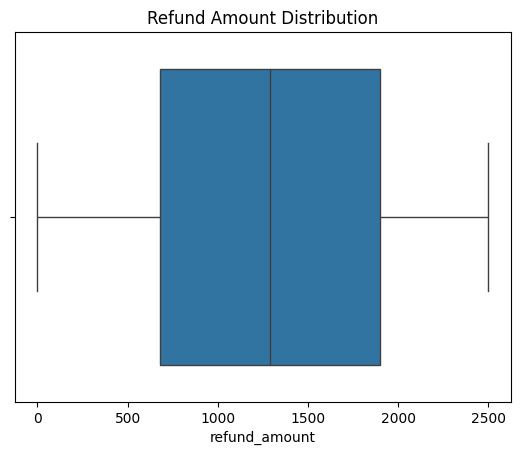

In [ ]:

sns.boxplot(x=df_return['refund_amount'])
plt.title("Refund Amount Distribution")
plt.show()

# # Optionally clip extreme values
# q_low, q_hi = df_return['refund_amount'].quantile([0.01, 0.99])
# df_return['refund_amount'] = df_return['refund_amount'].clip(q_low, q_hi)



In [ ]:
df_return.isnull().sum()

,0
return_id,0
user_id,0
sku_id,0
return_date,0
return_reason,0
product_condition,0
refund_amount,0


In [ ]:
df_return.head(11)

,return_id,user_id,sku_id,return_date,return_reason,product_condition,refund_amount
0,R00001,U2402,P0654,2024-07-16,Missing parts,Used,1925.59
1,R00002,U4300,P0268,2024-10-18,Wrong product,Used,2386.87
2,R00003,U3013,P0037,2025-03-03,Poor quality,Opened,1773.01
3,R00004,U2035,P0603,2025-06-23,Unknown,Opened,1484.13
4,R00005,U4557,P0981,2024-08-27,Poor quality,New,159.07
5,R00006,U4472,INVALID_SKU,2025-06-18,Missing parts,Used,1712.91
6,R00007,U3493,P1439,2024-07-16,Poor quality,New,1216.36
7,R00008,U2891,P1315,2024-08-09,Wrong product,New,2375.86
8,R00009,U3187,P0774,2025-01-01,Poor quality,New,1161.04
9,R00010,U1497,P0819,2025-03-30,Damaged item,Opened,2151.17


In [ ]:
invalid_sku_count = df_return[df_return['sku_id'] == 'INVALID_SKU'].shape[0]
print(f"Number of rows with INVALID_SKU: {invalid_sku_count}")


Number of rows with INVALID_SKU: 107


In [ ]:
df_return = df_return[df_return['sku_id'] != 'INVALID_SKU']
print("Removed rows with INVALID_SKU.")

Removed rows with INVALID_SKU.


In [ ]:
df_return.head(11)

,return_id,user_id,sku_id,return_date,return_reason,product_condition,refund_amount
0,R00001,U2402,P0654,2024-07-16,Missing parts,Used,1925.59
1,R00002,U4300,P0268,2024-10-18,Wrong product,Used,2386.87
2,R00003,U3013,P0037,2025-03-03,Poor quality,Opened,1773.01
3,R00004,U2035,P0603,2025-06-23,Unknown,Opened,1484.13
4,R00005,U4557,P0981,2024-08-27,Poor quality,New,159.07
6,R00007,U3493,P1439,2024-07-16,Poor quality,New,1216.36
7,R00008,U2891,P1315,2024-08-09,Wrong product,New,2375.86
8,R00009,U3187,P0774,2025-01-01,Poor quality,New,1161.04
9,R00010,U1497,P0819,2025-03-30,Damaged item,Opened,2151.17
10,R00011,U4662,P0732,2024-09-20,No longer needed,Used,1699.99


# Feature engineering for FUTURE WORK
| Features (needed later)            | Purpose                                    |
| ------------------ | ------------------------------------------ |
| `is_damaged`       | Extract from `return_reason`, flag damage  |
| `days_to_return`   | Requires `order_date` → create later       |
| `high_refund_flag` | Flag rows with refund > threshold (₹1000?) |


In [ ]:
# lets revisit the duplication part
duplicate_count = df_return.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")


Total Duplicate Rows: 0


# SUMMARY
| Step                                    | Status                    |
| --------------------------------------- | ------------------------- |
| Missing Values                          | Handled                   |
| Data Type Formatting                    | Done                      |
| Logical Inconsistencies (`INVALID_SKU`) | Removed                   |
| Duplicates                              | None Found                |
| Outlier Detection                       | N/A (Not applicable here) |
| Feature Engineering                     | Not Required              |


In [ ]:
df_return.to_csv("clean_returns.csv", index=False)
print("returns.csv cleaned & saved.")

returns.csv cleaned & saved.
